# Comparison 0/1 knapsack problem in Meta-Heuristic Techniques and Dynamic    Programming

#  Solving  0/1 knapsack problem in DP

### Knapsack problem

Select an execution option:
	1 - Insert data manually
	2 - Automatic generate data

	Option: 


 2


Items: [backpack(weight=27, value=62), backpack(weight=49, value=62), backpack(weight=34, value=93), backpack(weight=30, value=69), backpack(weight=39, value=92), backpack(weight=34, value=55), backpack(weight=31, value=12), backpack(weight=38, value=68), backpack(weight=48, value=54), backpack(weight=36, value=71), backpack(weight=38, value=75), backpack(weight=34, value=11), backpack(weight=30, value=64), backpack(weight=20, value=33), backpack(weight=42, value=76), backpack(weight=20, value=74), backpack(weight=29, value=44), backpack(weight=40, value=94), backpack(weight=33, value=85), backpack(weight=26, value=42), backpack(weight=44, value=11), backpack(weight=35, value=55)]
Wlist: [27, 49, 34, 30, 39, 34, 31, 38, 48, 36, 38, 34, 30, 20, 42, 20, 29, 40, 33, 26, 44, 35]
Vlist: [62, 62, 93, 69, 92, 55, 12, 68, 54, 71, 75, 11, 64, 33, 76, 74, 44, 94, 85, 42, 11, 55]
Number of Items : 22


## Parameters
Population size......: 118
Number of generations: 969
Crossover probability: 0.5


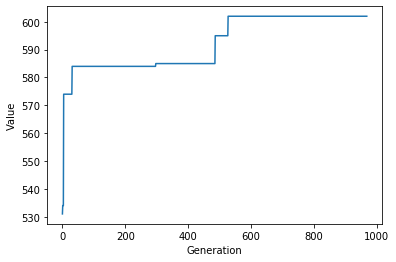

Period               :    53.877713203430176


In [17]:
# %load knapsack.py
import collections
import time
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import random
from numpy.random import randint

from utils import (apply_crossover, apply_mutation, calculate_fitness,
                   find_two_fittest_individuals, generate_population,
                   parent_selection)

Item = collections.namedtuple('backpack', 'weight value')

w = []
v = []

def find_solution():
    print('\n\n## Searching for the best solution ')
    population = generate_population(population_size, backpack_capacity)

    value = []
    iteraction = []
    best_solution = None

    for i in range(max_generations):
        fitness = calculate_fitness(population, items, max_weight)
        parents = parent_selection(fitness)
        crossovered = apply_crossover(parents, backpack_capacity, crossover_probability, mutation_probability)
        population = calculate_fitness(crossovered, items, max_weight)

        candidate, _ = find_two_fittest_individuals(population)
        if best_solution is None:
            best_solution = candidate
        elif candidate.value > best_solution.value:
            best_solution = candidate

        value.append(best_solution.value)
        iteraction.append(i)

        if i % 100 == 0:
            print('\nCurrent generation..: {}'.format(i))
            print('Best solution so far: {}'.format(best_solution.value))

    
    print('\n\n## Best solution found:')
    print('\nWeight: {}'.format(best_solution.weight))
    print('Value.: {}'.format(best_solution.value))
    print('\nBackpack configuration: {}'.format(best_solution.cromossome))


    plt.plot(iteraction, value)
    plt.xlabel('Generation')
    plt.ylabel('Value')
    plt.show()


def mainfunction():
    print('### Knapsack problem')

    option = 0

    print('\nSelect an execution option:')
    print('\t1 - Insert data manually')
    print('\t2 - Automatic generate data')
    print('\n\tOption: ',)
    option = input()
    option = int(option)
    
    start = time.time()
    if option == 1:
        items = []
        print('\nInsert the population size: ')
        population_size = input()
        population_size =int(population_size)
        print('\nInsert the number of generations: ')
        max_generations = input()
        max_generations = int(max_generations)
        print('\nInsert the crossover probability (0.0 to 1.0): ')
        crossover_probability = input()
        crossover_probability = float(crossover_probability)
        print('\nInsert the mutation probability (0.0 to 1.0): ')
        mutation_probability = input()
        mutation_probability = float(mutation_probability)
        print('\nInsert the number of items (backpack capacity): ')
        backpack_capacity = input()
        backpack_capacity = int(backpack_capacity)
        print('\nInsert the max weight for the backpack: ')
        max_weight = input()
        max_weight = int(max_weight)
        print("\n\n## Setting the items up")
        for i in range(backpack_capacity):
            weight = 0
            value = 0

            print('\nItem number {}: '.format(i+1))
            
            print('\tWeight:')
            weight = input()
            weight = int(weight)
            print('\tValue.:')
            value = input()
            value = int(value)

            items.append(Item(weight=weight, value=value))
    elif option == 2:
        population_size = random.randint(50, 200)
        max_generations = random.randint(100, 1000)
        crossover_probability = round(random.uniform(low=0.3, high=1.0), 1)
        #mutation_probability = round(random.uniform(low=0.0, high=0.5), 2)
        mutation_probability = 0.04
        backpack_capacity = random.randint(20, 30)
        #max_weight = random.randint(50, 100)
        max_weight = 250
        max_item_weight = 50
        max_item_value = 100

        items = []
        for i in range(backpack_capacity):
            weight = random.randint(20, max_item_weight)
            value = random.randint(10, max_item_value)
            items.append(
            Item(
                weight = weight, 
                value = value
                )
            )
            w.append(weight)
            v.append(value)
        backpack_capacity = len(items)
        print('Items: ' + str(items))
        print('Wlist: ' + str(w))
        print('Vlist: ' + str(v))
        print('Number of Items :', len(w))
    else:
        print('\nInvalid option!')
        exit(1)        
    
    print('\n\n## Parameters')
    print('Population size......: {}'.format(population_size))
    print('Number of generations: {}'.format(max_generations))
    print('Crossover probability: {}'.format(crossover_probability))
    print('Mutation probability.: {}'.format(mutation_probability))
    print('Backpack capacity....: {}'.format(backpack_capacity))
    print('Max backpack weight..: {}'.format(max_weight))
    
    find_solution()
    end = time.time()
    print('Period               :   ',end-start)
    

# Solving 0/1 Knapsack in DP

In [18]:
def bag(n, c, w, v):
    value = [[0 for j in range(c + 1)] for i in range(n + 1)]
    for i in range(1, n + 1):
        for j in range(1, c + 1):
            value[i][j] = value[i - 1][j]
            if j >= w[i - 1] and value[i][j] < value[i - 1][j - w[i - 1]] + v[i - 1]:
                value[i][j] = value[i - 1][j - w[i - 1]] + v[i - 1]
    print(value)
    return value

def show(n, c, w, value):
    print('Max_Value :', value[n][c])
    x = [False for i in range(n)]
    j = c
    for i in range(n, 0, -1):
        if value[i][j] > value[i - 1][j]:
            x[i - 1] = True
            j -= w[i - 1]
    bag = []
    count =0
    newbag = []      
    for i in range(n):  
        if x[i]:
            bag.append(i+1)
            newbag.append(
                (w[i],v[i])
            )
    sum = 0
    num = len(newbag)
    for item in range(num):
        sum += newbag[item][0]
    print('\nNow Bag = ', str(bag))
    print('\nTotal Used Weight = ', sum)
    print('\nWeight Bag = ', str(newbag))

def bag1(n, c, w, v):
    values = [0 for i in range(c+1)]
    for i in range(1, n + 1):
        for j in range(c, 0, -1):
            if j >= w[i-1]:
                values[j] = max(values[j-w[i-1]]+v[i-1], values[j])
    return values

n = len(w)
c = max_weight
print('Number of Items :', n)
print('Max_Capacity : ', c)
print('Wlist: ', str(w))
print('Vlist: ', str(v))
value = bag(n, c, w, v)
show(n, c, w, value)

Number of Items : 22
Max_Capacity :  250
Wlist:  [27, 49, 34, 30, 39, 34, 31, 38, 48, 36, 38, 34, 30, 20, 42, 20, 29, 40, 33, 26, 44, 35]
Vlist:  [62, 62, 93, 69, 92, 55, 12, 68, 54, 71, 75, 11, 64, 33, 76, 74, 44, 94, 85, 42, 11, 55]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,

In [99]:
# init 

start = time.time()
count = 1000000


print('-----------Simluation1 :-----------\n')
testw = [2, 3, 5, 8, 13, 16]
testv = [1, 2, 3, 5, 7, 10]
testc = 30
testn = 6
#n = len(w)
#c = max_weight
#value = bag(n, c, w, v)
#show(n, c, w, value)
#print('Wlist: ', str(w))
#print('Vlist: ', str(v))
print('testWlist: ', str(testw))

print('testVlist: ', str(testv))

value = bag(testn, testc , testw, testv)
show(testn, testc, testw, value)
end = time.time()

print('Period1 , ', end - start)
print('-----------Simluation1 end :--------\n')
print('-----------Simluation2 :-----------\n')
start = time.time()
test2w = [70 ,73, 77, 80, 82, 87, 90, 94, 98, 106,110, 113, 115, 118, 120]
test2v = [135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
test2n = 15
test2c = 750

print('test2Wlist' + str(test2w))
print('test2Vlist' + str(test2v))

value2 = bag(test2n, test2c, test2w ,test2v)
show(test2n, test2c, test2w, value2)
end = time.time()

print('Period2 , ', end - start)

print('-----------Simluation2 end :---------\n')

-----------Simluation1 :-----------

testWlist:  [2, 3, 5, 8, 13, 16]
testVlist:  [1, 2, 3, 5, 7, 10]
Max_Value : 18

Now Bag =  [1, 2, 4, 6]

Total Used Weight =  29

Weight Bag =  [(2, 77), (3, 51), (8, 79), (16, 35)]
Period1 ,  0.003995656967163086
-----------Simluation1 end :--------

-----------Simluation2 :-----------

test2Wlist[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110, 113, 115, 118, 120]
test2Vlist[135, 139, 149, 150, 156, 163, 173, 184, 192, 201, 210, 214, 221, 229, 240]
Max_Value : 1458

Now Bag =  [1, 3, 5, 7, 8, 9, 14, 15]

Total Used Weight =  749

Weight Bag =  [(70, 77), (77, 25), (82, 93), (90, 58), (94, 18), (98, 49), (118, 77), (120, 65)]
Period2 ,  0.010993719100952148
-----------Simluation2 end :---------

